Want to get the result of gamma analysis using omnipro to compare with gamma analysis using custom python code. Inspired by https://github.com/vcc-LG/omnipro-matrixx-compare/blob/master/matrixx_compare.py

Export data as .txt seperated by comma, check this file in EXCEL and is OK for import

http://stackoverflow.com/questions/24716001/reading-in-a-text-file-in-a-set-line-range

In [3]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is AE83-8D62

 Directory of C:\Users\RCole02.ROYALSURREY\Desktop\GitHub\Useful-python-for-medical-physics\Experiments in ipython notebooks\Omnipro\Im RT

31/10/2016  12:26    <DIR>          .
31/10/2016  12:26    <DIR>          ..
31/10/2016  11:22    <DIR>          .ipynb_checkpoints
31/10/2016  12:07             5,257 file_short.csv
31/10/2016  11:01           153,858 gamma.png
31/10/2016  11:44            56,983 Gamma_txt_import_EXCEL.csv
31/10/2016  11:03           140,212 Gamma1.csv
31/10/2016  11:02            20,279 Gamma1.jpg
31/10/2016  11:03           140,212 Gamma1.opg
31/10/2016  11:03           140,212 Gamma1.txt
31/10/2016  11:15             5,764 matrixx_compare.py
31/10/2016  12:26             6,822 Test import of Im RT export of gamma analysis.ipynb
               9 File(s)        669,599 bytes
               3 Dir(s)  368,690,327,552 bytes free


In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

inspected the .txt file by loading into EXCEL, produce parser

In [78]:
# get index of x and data
file = 'Gamma1.txt'
with open(file, "r") as my_file:
    ascibody_idx = 0  # variable for index of final ascibody
    x_idx  = 0        # variable for index of X[cm]
    z_idx  = 0  
    x_data = []
    
    for i, line in enumerate(my_file):
        if line.startswith('X[cm]'):
            x_idx = i             # index of  X[cm]   
            x_coords = [float(x) for x in line.split(',')[1:-1]]   # data of X[cm] in
        
        if line.startswith('Z[cm]'):
            x_idx = i+1             # index of  X[cm]   
            x_data.append(line)   # data of X[cm]
        
        if line.startswith('</asciibody>'):
            ascibody_idx = i  # get the index of final ascibody    
    x_coords = np.array(x_coords)
    my_file.close()   

In [86]:
x_coords.shape

(152,)

In [99]:
x_coords[-1]

18.829999999999998

In [80]:
# get z data from body
z_coords = []
with open('Gamma1.txt', "r") as my_file:
    for line in it.islice(my_file, x_idx+1, ascibody_idx-1):  # ascibody_idx-1
        z_coords.append(float([x for x in line.split(',')][0]))    # zero point is cooordinate data, comvert string to float
z_coords = np.array(z_coords)   # convert to an array

In [81]:
z_coords.shape

(98,)

In [110]:
# get z data from body
z_data = []
with open('Gamma1.txt', "r") as my_file:
    for line in it.islice(my_file, x_idx+1, ascibody_idx-1):  # ascibody_idx-1
        z_data.append([float(x) for x in line.split(',')[1:-1]])    # split line on comma, ignore first and last points in order for split to work
z_data = np.array(z_data)/1000.0   # convert to an array and normalise to scale 0 to 2

In [111]:
z_data.shape

(98, 152)

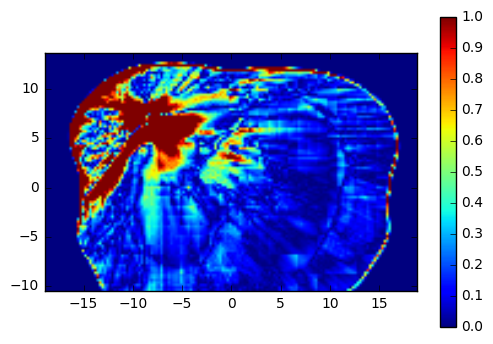

In [113]:
plt.imshow(z_data, vmax=1.0, origin='lower', extent=[x_coords[0],x_coords[-1], z_coords[0], z_coords[-1]]); # vmin=0,vmax=2.0,
plt.colorbar();